# Getting started with the Keras sequential model

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import random

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.13.1


In [7]:
# Set common constants
this_repo_url = 'https://github.com/CLynie/Lynie_tensorflow-tutorial/blob/master/'
this_tutorial_url = this_repo_url + 'Classification_of_MNIST '

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">


Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [8]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

We <b> scale these values </b> to a range of <b> 0 to 1 </b> before feeding to the neural network model. For this, we divide the values by 255. It's important that the **_training set_** and the **_testing set_** are preprocessed in the same way:

In [9]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
print(np.shape(train_images))
test_images = preprocess_images(test_images)

(60000, 28, 28, 1)


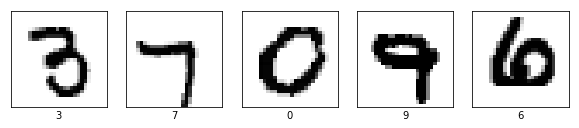

In [10]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rd = random.randrange(train_images.shape[0]-5)
    plt.imshow(train_images[i+rd].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i+rd])

In [15]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation=tf.nn.tanh, input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation=tf.nn.tanh))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation=tf.nn.tanh))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2068 - acc: 0.9365
Epoch 2/5
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.1157 - acc: 0.9641
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1068 - acc: 0.9661
Epoch 4/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1009 - acc: 0.9683
Epoch 5/5
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0962 - acc: 0.9704


In [18]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
10000/10000 [==============================] - 3s 278us/sample - loss: 0.0609 - acc: 0.9814
Test accuracy: 0.9814
